In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd

# Path to the Excel file
file_path = r'C:\Users\avivh\Desktop\פרוייקט גמר\LogisticReggression.xlsx'

# Load the Excel file into a pandas DataFrame
data = pd.read_excel(file_path)

# Display the first few rows of the data to verify import
print(data.head())

data = data.dropna()

# Adding the dummy variable
#data['Has_Opportunity'] = np.where(data['Y = Is there an arbitrage opportunity'] == 1, 1, 0)

# Defining the target variable Y and explanatory variables X, including Has_Opportunity and X4 (Coin Price during launch)
X = data[['X1 = Trading volume difference in percentage', 
          'X2 = Price change in percentage before coin launch', 
          'X3 = Coin Price at the point'
          ]]
y = data['Y = Is there an arbitrage opportunity']




     Date        Launch  Y = Is there an arbitrage opportunity  \
0     NaN           NaN                                    NaN   
1  1.5.23    PEPE - OKX                                    1.0   
2  5.5.23   PEPE-KuCoin                                    1.0   
3  5.5.23  PEPE- KuCoin                                    1.0   
4  5.5.23  PEPE-Binance                                    0.0   

   X1 = Trading volume difference in percentage  \
0                                           NaN   
1                                          57.0   
2                                         202.0   
3                                         113.0   
4                                          86.0   

   X2 = Price change in percentage before coin launch  \
0                                                NaN    
1                                               66.0    
2                                               22.0    
3                                               64.0    
4          

In [26]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Defining and training the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Printing model performance
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

# Getting model coefficients (betas) and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Displaying coefficients and intercept
print("\nModel Intercept (Bias):", intercept)
print("Model Coefficients (Betas):")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")


Model Accuracy: 0.875

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.75      0.86         4
         1.0       0.80      1.00      0.89         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8


Model Intercept (Bias): 3.126390258358916
Model Coefficients (Betas):
X1 = Trading volume difference in percentage: 0.0017582771726725882
X2 = Price change in percentage before coin launch: -0.0213020663492432
X3 = Coin Price at the point: -1.5832000671936384


AOC-ROC

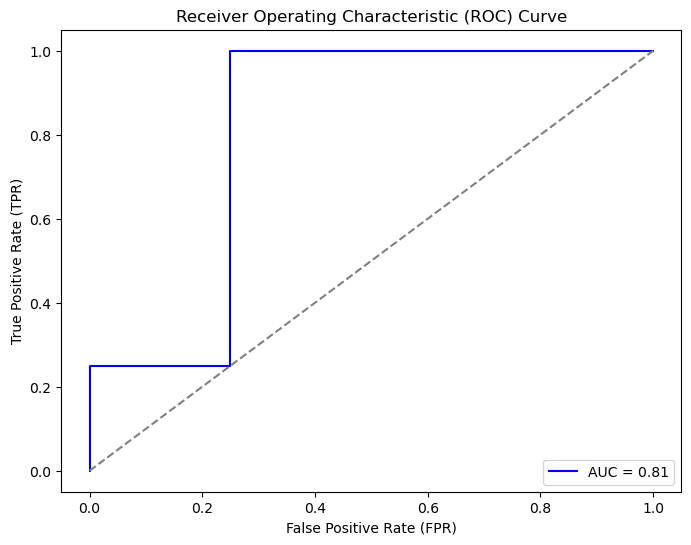

AUC Score: 0.8125


In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming X_test, y_test are the test set and y_pred_prob are the predicted probabilities

# Step 1: Predict probabilities for the positive class (1)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability for class 1

# Step 2: Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Step 3: Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Step 4: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guessing line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print("AUC Score:", auc_score)


Normalizing and balancing the data

In [33]:
from sklearn.preprocessing import StandardScaler

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced')

In [34]:

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Printing model performance
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

# Getting model coefficients (betas) and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Displaying coefficients and intercept
print("\nModel Intercept (Bias):", intercept)
print("Model Coefficients (Betas):")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")


Model Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.67      0.80         3
         1.0       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6


Model Intercept (Bias): -0.011537171709150078
Model Coefficients (Betas):
X1 = Trading volume difference in percentage: 0.005698106529630936
X2 = Price change in percentage before coin launch: -0.010865383866171656
X3 = Coin Price during launch: -0.7217417375241029
Has_Opportunity: 1.3949208961515607


Logistic Reggression with time dimension

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd

# Path to the Excel file
file_path = r'C:\Users\avivh\Desktop\פרוייקט גמר\LogisticReggression2.xlsx'

# Load the Excel file into a pandas DataFrame
data = pd.read_excel(file_path)

# Display the first few rows of the data to verify import
print(data.head())

data = data.dropna()

# Adding the dummy variable
data['Has_Opportunity'] = np.where(data['Y = Is there an arbitrage opportunity'] == 1, 1, 0)

# Defining the target variable Y and explanatory variables X, including Has_Opportunity and X4 (Coin Price during launch)
X = data[['X1 = Trading volume difference in percentage', 
          'X2 = Time from launch to opportunity window start',
          'X3 = Price change in percentage before coin launch', 
          'X4 = Coin Price during launch',
          'Has_Opportunity']]
y = data['Y = Is there an arbitrage opportunity']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Defining and training the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Printing model performance
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

# Getting model coefficients (betas) and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Displaying coefficients and intercept
print("\nModel Intercept (Bias):", intercept)
print("Model Coefficients (Betas):")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")



     Date        Launch  Y = Is there an arbitrage opportunity  \
0     NaN           NaN                                    NaN   
1  1.5.23    PEPE - OKX                                    1.0   
2  5.5.23   PEPE-KuCoin                                    1.0   
3  5.5.23  PEPE- KuCoin                                    1.0   
4  6.5.23  PEPE-Binance                                    0.0   

   X1 = Trading volume difference in percentage  \
0                                           NaN   
1                                          57.0   
2                                         202.0   
3                                         113.0   
4                                          86.0   

   X2 = Time from launch to opportunity window start  \
0                                                NaN   
1                                                0.0   
2                                               54.0   
3                                              100.0   
4               